<a href="https://colab.research.google.com/github/Saaicharan/TITANICPRED/blob/main/TITANIC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')
   Survived  Pclass                                               Name  \
0         0       3                             Mr. Owen Harris Braund   
1         1       1  Mrs. John Bradley (Florence Briggs Thayer) Cum...   
2         1       3                              Miss. Laina Heikkinen   
3         1       1        Mrs. Jacques Heath (Lily May Peel) Futrelle   
4         0       3                            Mr. William Henry Allen   

      Sex   Age  Siblings/Spouses Aboard  Parents/Children Aboard     Fare  
0    male  22.0                        1                        0   7.2500  
1  female  38.0                        1                        0  71.2833  
2  female  26.0                        0                        0   7.9250  
3  female  35.0                        1                        0  53.1000  
4    male  35.0            

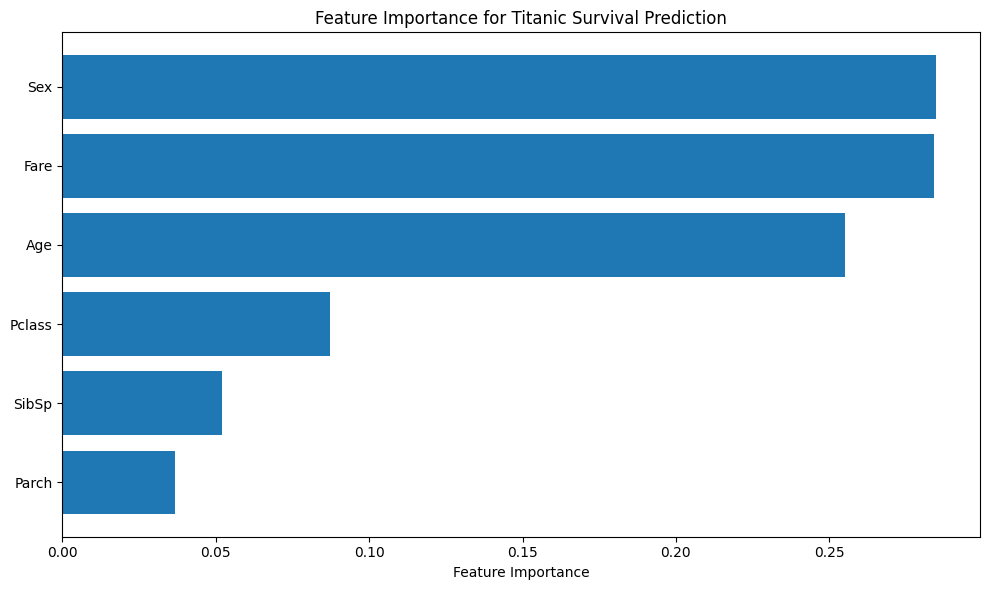

<Figure size 1000x600 with 0 Axes>

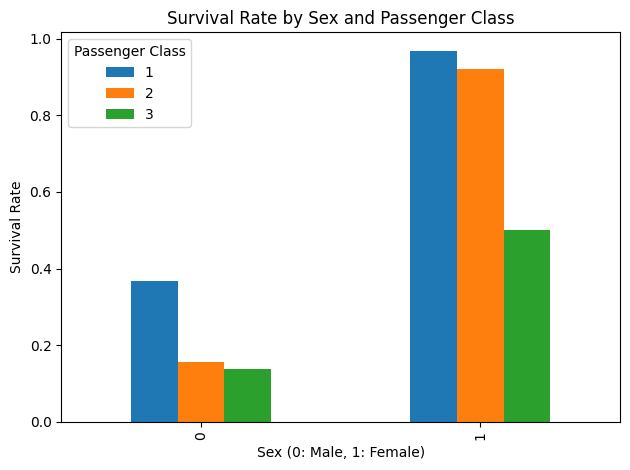

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Load the data
url = "https://web.stanford.edu/class/archive/cs/cs109/cs109.1166/stuff/titanic.csv"
df = pd.read_csv(url)

# Print column names and first few rows
print(df.columns)
print(df.head())

# Data preprocessing
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})

# Rename columns to match conventional names
df = df.rename(columns={
    'Siblings/Spouses Aboard': 'SibSp',
    'Parents/Children Aboard': 'Parch'
})

# Split features and target
X = df.drop(['Survived', 'Name'], axis=1)
y = df['Survived']

# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create preprocessing steps
numeric_features = ['Age', 'Fare', 'SibSp', 'Parch']
categorical_features = ['Pclass', 'Sex']

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Create a pipeline
clf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('classifier', RandomForestClassifier(n_estimators=100, random_state=42))])

# Fit the model
clf.fit(X_train, y_train)

# Make predictions
y_pred = clf.predict(X_test)

# Print the model's accuracy
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Feature importance
feature_importance = clf.named_steps['classifier'].feature_importances_
feature_names = numeric_features + categorical_features

# Sort features by importance
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

# Plot feature importance
fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(pos, feature_importance[sorted_idx], align='center')
ax.set_yticks(pos)
ax.set_yticklabels(np.array(feature_names)[sorted_idx])
ax.set_xlabel('Feature Importance')
ax.set_title('Feature Importance for Titanic Survival Prediction')
plt.tight_layout()
plt.show()

# Analyze survival rate by sex and class
survival_by_sex_class = df.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack()
plt.figure(figsize=(10, 6))
survival_by_sex_class.plot(kind='bar')
plt.title('Survival Rate by Sex and Passenger Class')
plt.xlabel('Sex (0: Male, 1: Female)')
plt.ylabel('Survival Rate')
plt.legend(title='Passenger Class')
plt.tight_layout()
plt.show()